In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [21]:
iris = datasets.load_iris()

feat_labels = ['Sepal Length','Sepal Width','Petal Length','Petal Width']

X = iris.data
y = iris.target

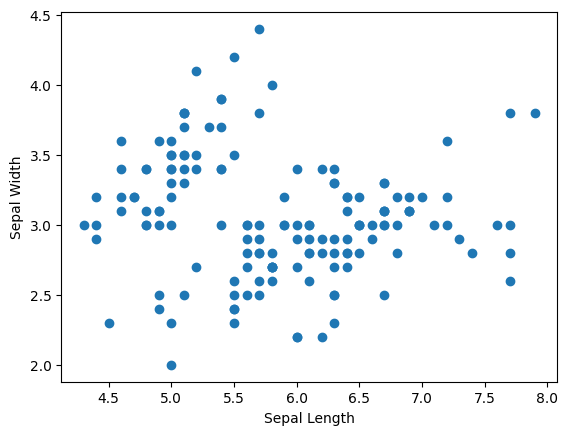

('Sepal Length', np.float64(0.680817782356599))
('Sepal Width', np.float64(0.3191822176434011))
Sepal Length
Sepal Width
0.68


In [22]:
# ########################## Primero SL con SW ##########################
x1 = X[:, :2] # cojo solo las columnas que me interesan
# divido los datos para el entrenamiento
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.5, random_state=0)

# Scatter de los datos con los que vamos a entrenar
plt.scatter(x1[:, 0], x1[:, 1])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

# ------------- ver la importancia de cada categoria -------------
# creamos un arbol random
clf1 = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
# entrenamos los datos con el arbol
clf1.fit(x1_train, y1_train)
# sacar los datos con la importancia
for feature in zip(feat_labels, clf1.feature_importances_):
    print(feature)

# ------------- Comprobar la mejor categoria -------------
# crear un selector con el que usa el arbol anterior para ver la mejor categoria
sfm1 = SelectFromModel(clf1, threshold=0.15)
# Train the selector
sfm1.fit(x1_train, y1_train)

# imprimir las categorias importantes
for feature_list_index in sfm1.get_support(indices=True):
    print(feat_labels[feature_list_index])

# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
x1_important_train = sfm1.transform(x1_train)
x1_important_test = sfm1.transform(x1_test)

# ------------- accuracy total -------------
# creamos un arbol nuevo pero con los datos importantes
clf1_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
clf1_important.fit(x1_important_train, y1_train)

# Apply The Full Featured Classifier To The Test Data
y1_important_pred = clf1_important.predict(x1_important_test)
# View The Accuracy Of Our Limited Feature (2 Features) Model
slSwAcc = accuracy_score(y1_test, y1_important_pred)
print(slSwAcc)

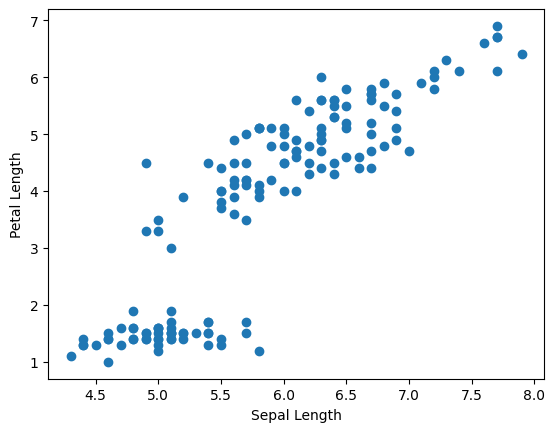

('Sepal Length', np.float64(0.3515094776208953))
('Sepal Width', np.float64(0.6484905223791045))
Sepal Length
Sepal Width
0.9066666666666666


In [23]:
# ########################## SL con PL ##########################
x2 = X[:, [0, 2]] # :-> selcciona todas las filas y [0, 2]-> selecciona las columnas 0 y 2
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.5, random_state=0)

# Scatter de los datos con los que vamos a entrenar
plt.scatter(x2[:, 0], x2[:, 1])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.show()

# ------------- ver la importancia de cada categoria -------------
# creamos un arbol random
clf2 = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
clf2.fit(x2_train, y2_train)
for feature in zip(feat_labels, clf2.feature_importances_):
    print(feature)

# ------------- Comprobar la mejor categoria -------------
# crear un selector con el que usa el arbol anterior para ver la mejor categoria
sfm2 = SelectFromModel(clf2, threshold=0.15)
# Train the selector
sfm2.fit(x2_train, y2_train)

# imprimir las categorias importantes
for feature_list_index in sfm2.get_support(indices=True):
    print(feat_labels[feature_list_index])

# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
x2_important_train = sfm2.transform(x2_train)
x2_important_test = sfm2.transform(x2_test)

# ------------- accuracy total -------------
# creamos un arbol nuevo pero con los datos importantes
clf2_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
clf2_important.fit(x2_important_train, y2_train)

# Apply The Full Featured Classifier To The Test Data
y2_important_pred = clf2_important.predict(x2_important_test)
# View The Accuracy Of Our Limited Feature (2 Features) Model
slPlAcc = accuracy_score(y2_test, y2_important_pred)
print(slPlAcc)

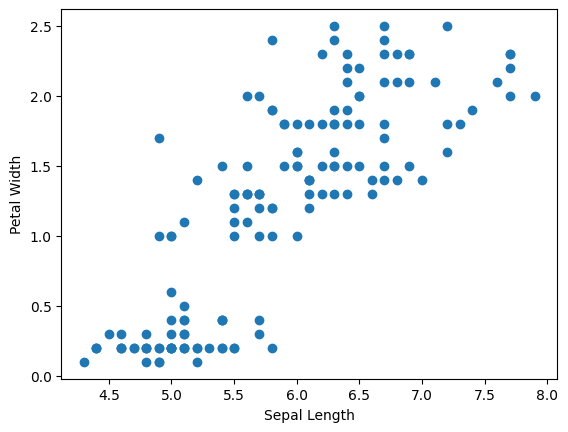

('Sepal Length', np.float64(0.3516151203189929))
('Sepal Width', np.float64(0.6483848796810071))
Sepal Length
Sepal Width
0.9466666666666667


In [24]:
# ########################## SL con PW ##########################
x3 = X[:, [0, 3]]
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y, test_size=0.5, random_state=0)

# Scatter de los datos con los que vamos a entrenar
plt.scatter(x3[:, 0], x3[:, 1])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.show()

# ------------- ver la importancia de cada categoria -------------
# creamos un arbol random
clf3 = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
clf3.fit(x3_train, y3_train)
for feature in zip(feat_labels, clf3.feature_importances_):
    print(feature)

# ------------- Comprobar la mejor categoria -------------
# crear un selector con el que usa el arbol anterior para ver la mejor categoria
sfm3 = SelectFromModel(clf3, threshold=0.15)
# Train the selector
sfm3.fit(x3_train, y3_train)

# imprimir las categorias importantes
for feature_list_index in sfm3.get_support(indices=True):
    print(feat_labels[feature_list_index])

# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
x3_important_train = sfm3.transform(x3_train)
x3_important_test = sfm3.transform(x3_test)

# ------------- accuracy total -------------
# creamos un arbol nuevo pero con los datos importantes
clf3_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
clf3_important.fit(x3_important_train, y3_train)

# Apply The Full Featured Classifier To The Test Data
y3_important_pred = clf3_important.predict(x3_important_test)
# View The Accuracy Of Our Limited Feature (2 Features) Model
slPwAcc = accuracy_score(y3_test, y3_important_pred)
print(slPwAcc)

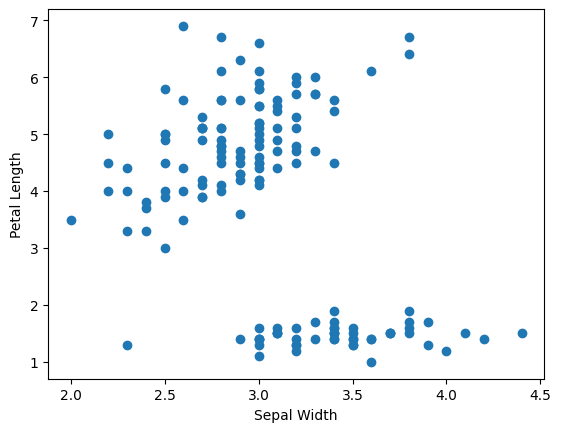

('Sepal Length', np.float64(0.2021211887276253))
('Sepal Width', np.float64(0.7978788112723746))
Sepal Length
Sepal Width
0.92


In [25]:
# ########################## SW con PL ##########################
x4 = X[:, [1, 2]]
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y, test_size=0.5, random_state=0)

# Scatter de los datos con los que vamos a entrenar
plt.scatter(x4[:, 0], x4[:, 1])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Length")
plt.show()

# ------------- ver la importancia de cada categoria -------------
# creamos un arbol random
clf4 = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
clf4.fit(x4_train, y4_train)
for feature in zip(feat_labels, clf4.feature_importances_):
    print(feature)

# ------------- Comprobar la mejor categoria -------------
# crear un selector con el que usa el arbol anterior para ver la mejor categoria
sfm4 = SelectFromModel(clf4, threshold=0.15)
# Train the selector
sfm4.fit(x4_train, y4_train)

# imprimir las categorias importantes
for feature_list_index in sfm4.get_support(indices=True):
    print(feat_labels[feature_list_index])

# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
x4_important_train = sfm4.transform(x4_train)
x4_important_test = sfm4.transform(x4_test)

# ------------- accuracy total -------------
# creamos un arbol nuevo pero con los datos importantes
clf4_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
clf4_important.fit(x4_important_train, y4_train)

# Apply The Full Featured Classifier To The Test Data
y4_important_pred = clf4_important.predict(x4_important_test)
# View The Accuracy Of Our Limited Feature (2 Features) Model
swPlAcc = accuracy_score(y4_test, y4_important_pred)
print(swPlAcc)

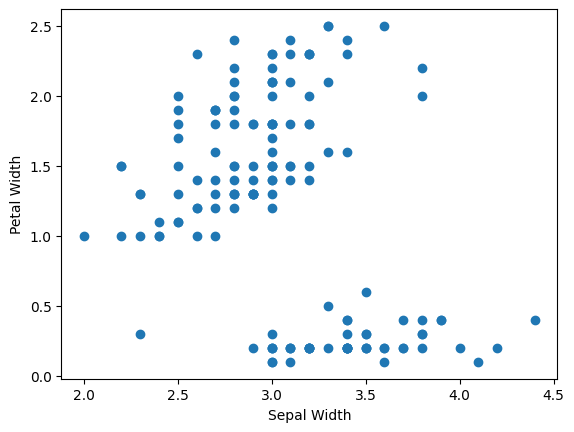

('Sepal Length', np.float64(0.2034479451993332))
('Sepal Width', np.float64(0.7965520548006668))
Sepal Length
Sepal Width
0.9066666666666666


In [26]:
# ########################## SW con PW ##########################
x5 = X[:, [1, 3]]
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y, test_size=0.5, random_state=0)

# Scatter de los datos con los que vamos a entrenar
plt.scatter(x5[:, 0], x5[:, 1])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.show()

# ------------- ver la importancia de cada categoria -------------
# creamos un arbol random
clf5 = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
clf5.fit(x5_train, y5_train)
for feature in zip(feat_labels, clf5.feature_importances_):
    print(feature)

# ------------- Comprobar la mejor categoria -------------
# crear un selector con el que usa el arbol anterior para ver la mejor categoria
sfm5 = SelectFromModel(clf5, threshold=0.15)
# Train the selector
sfm5.fit(x5_train, y5_train)

# imprimir las categorias importantes
for feature_list_index in sfm5.get_support(indices=True):
    print(feat_labels[feature_list_index])

# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
x5_important_train = sfm5.transform(x5_train)
x5_important_test = sfm5.transform(x5_test)

# ------------- accuracy total -------------
# creamos un arbol nuevo pero con los datos importantes
clf5_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
clf5_important.fit(x5_important_train, y5_train)

# Apply The Full Featured Classifier To The Test Data
y5_important_pred = clf5_important.predict(x5_important_test)
# View The Accuracy Of Our Limited Feature (2 Features) Model
swPwAcc = accuracy_score(y5_test, y5_important_pred)
print(swPwAcc)

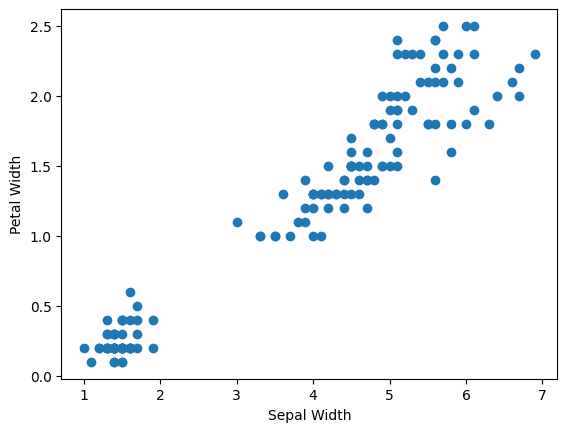

('Sepal Length', np.float64(0.4961631324124347))
('Sepal Width', np.float64(0.5038368675875653))
Sepal Length
Sepal Width
0.92


In [27]:
# ########################## PL con PW ##########################
x6 = X[:, [2, 3]]
x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y, test_size=0.5, random_state=0)

# Scatter de los datos con los que vamos a entrenar
plt.scatter(x6[:, 0], x6[:, 1])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.show()

# ------------- ver la importancia de cada categoria -------------
# creamos un arbol random
clf6 = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
clf6.fit(x6_train, y6_train)
for feature in zip(feat_labels, clf6.feature_importances_):
    print(feature)

# ------------- Comprobar la mejor categoria -------------
# crear un selector con el que usa el arbol anterior para ver la mejor categoria
sfm6 = SelectFromModel(clf6, threshold=0.15)
# Train the selector
sfm6.fit(x6_train, y6_train)

# imprimir las categorias importantes
for feature_list_index in sfm6.get_support(indices=True):
    print(feat_labels[feature_list_index])

# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
x6_important_train = sfm6.transform(x6_train)
x6_important_test = sfm6.transform(x6_test)

# ------------- accuracy total -------------
# creamos un arbol nuevo pero con los datos importantes
clf6_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
clf6_important.fit(x6_important_train, y6_train)

# Apply The Full Featured Classifier To The Test Data
y6_important_pred = clf6_important.predict(x6_important_test)
# View The Accuracy Of Our Limited Feature (2 Features) Model
plPwAcc = accuracy_score(y6_test, y6_important_pred)
print(plPwAcc)

In [29]:
# hacer el dataframe con pandas de cat1, cat2, acc1, acc2, accFinal
data = pd.DataFrame()



tabla = {
   'cat1': ["Sepal Length", "Sepal Length", "Sepal Length", "Sepal Width", "Sepal Width", "Petal Length"],  
   'cat2':["Sepal Width", "Petal Length", "Petal Width", "Petal Length", "Petal Width", "Petal Width"],  
   'acc1':[0, 0, 0, 0, 0, 0],  
   'acc2':[0, 0, 0, 0, 0, 0],  
   'accFinal':[slSwAcc, slPlAcc, slPwAcc, swPlAcc, swPwAcc, plPwAcc]  
}  
data = pd.DataFrame(tabla)
data

,cat1,cat2,acc1,acc2,accFinal
0,Sepal Length,Sepal Width,0,0,0.680000
1,Sepal Length,Petal Length,0,0,0.906667
2,Sepal Length,Petal Width,0,0,0.946667
3,Sepal Width,Petal Length,0,0,0.920000
4,Sepal Width,Petal Width,0,0,0.906667
5,Petal Length,Petal Width,0,0,0.920000
